# GUC Regression Model using linear regression

### Import packages and data set
#### Import the "Housing data" file
[Ref1](https://www.kaggle.com/code/shreayan98c/boston-house-price-prediction/notebook)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)

In [5]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 
# Median value of owner-occupied homes in $1000s

In [7]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [10]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

**Multivariate Analysis**
<br>
Multivariate analysis finds out the relationship between more than two variables. For that we can use a pair plot which shows a clear and nice view of all variables and their relation ship with all other variables. <br>
[Reference](https://github.com/raneemsultan/Data-Engineering-W21/blob/main/Lab1/Lab_1.ipynb)

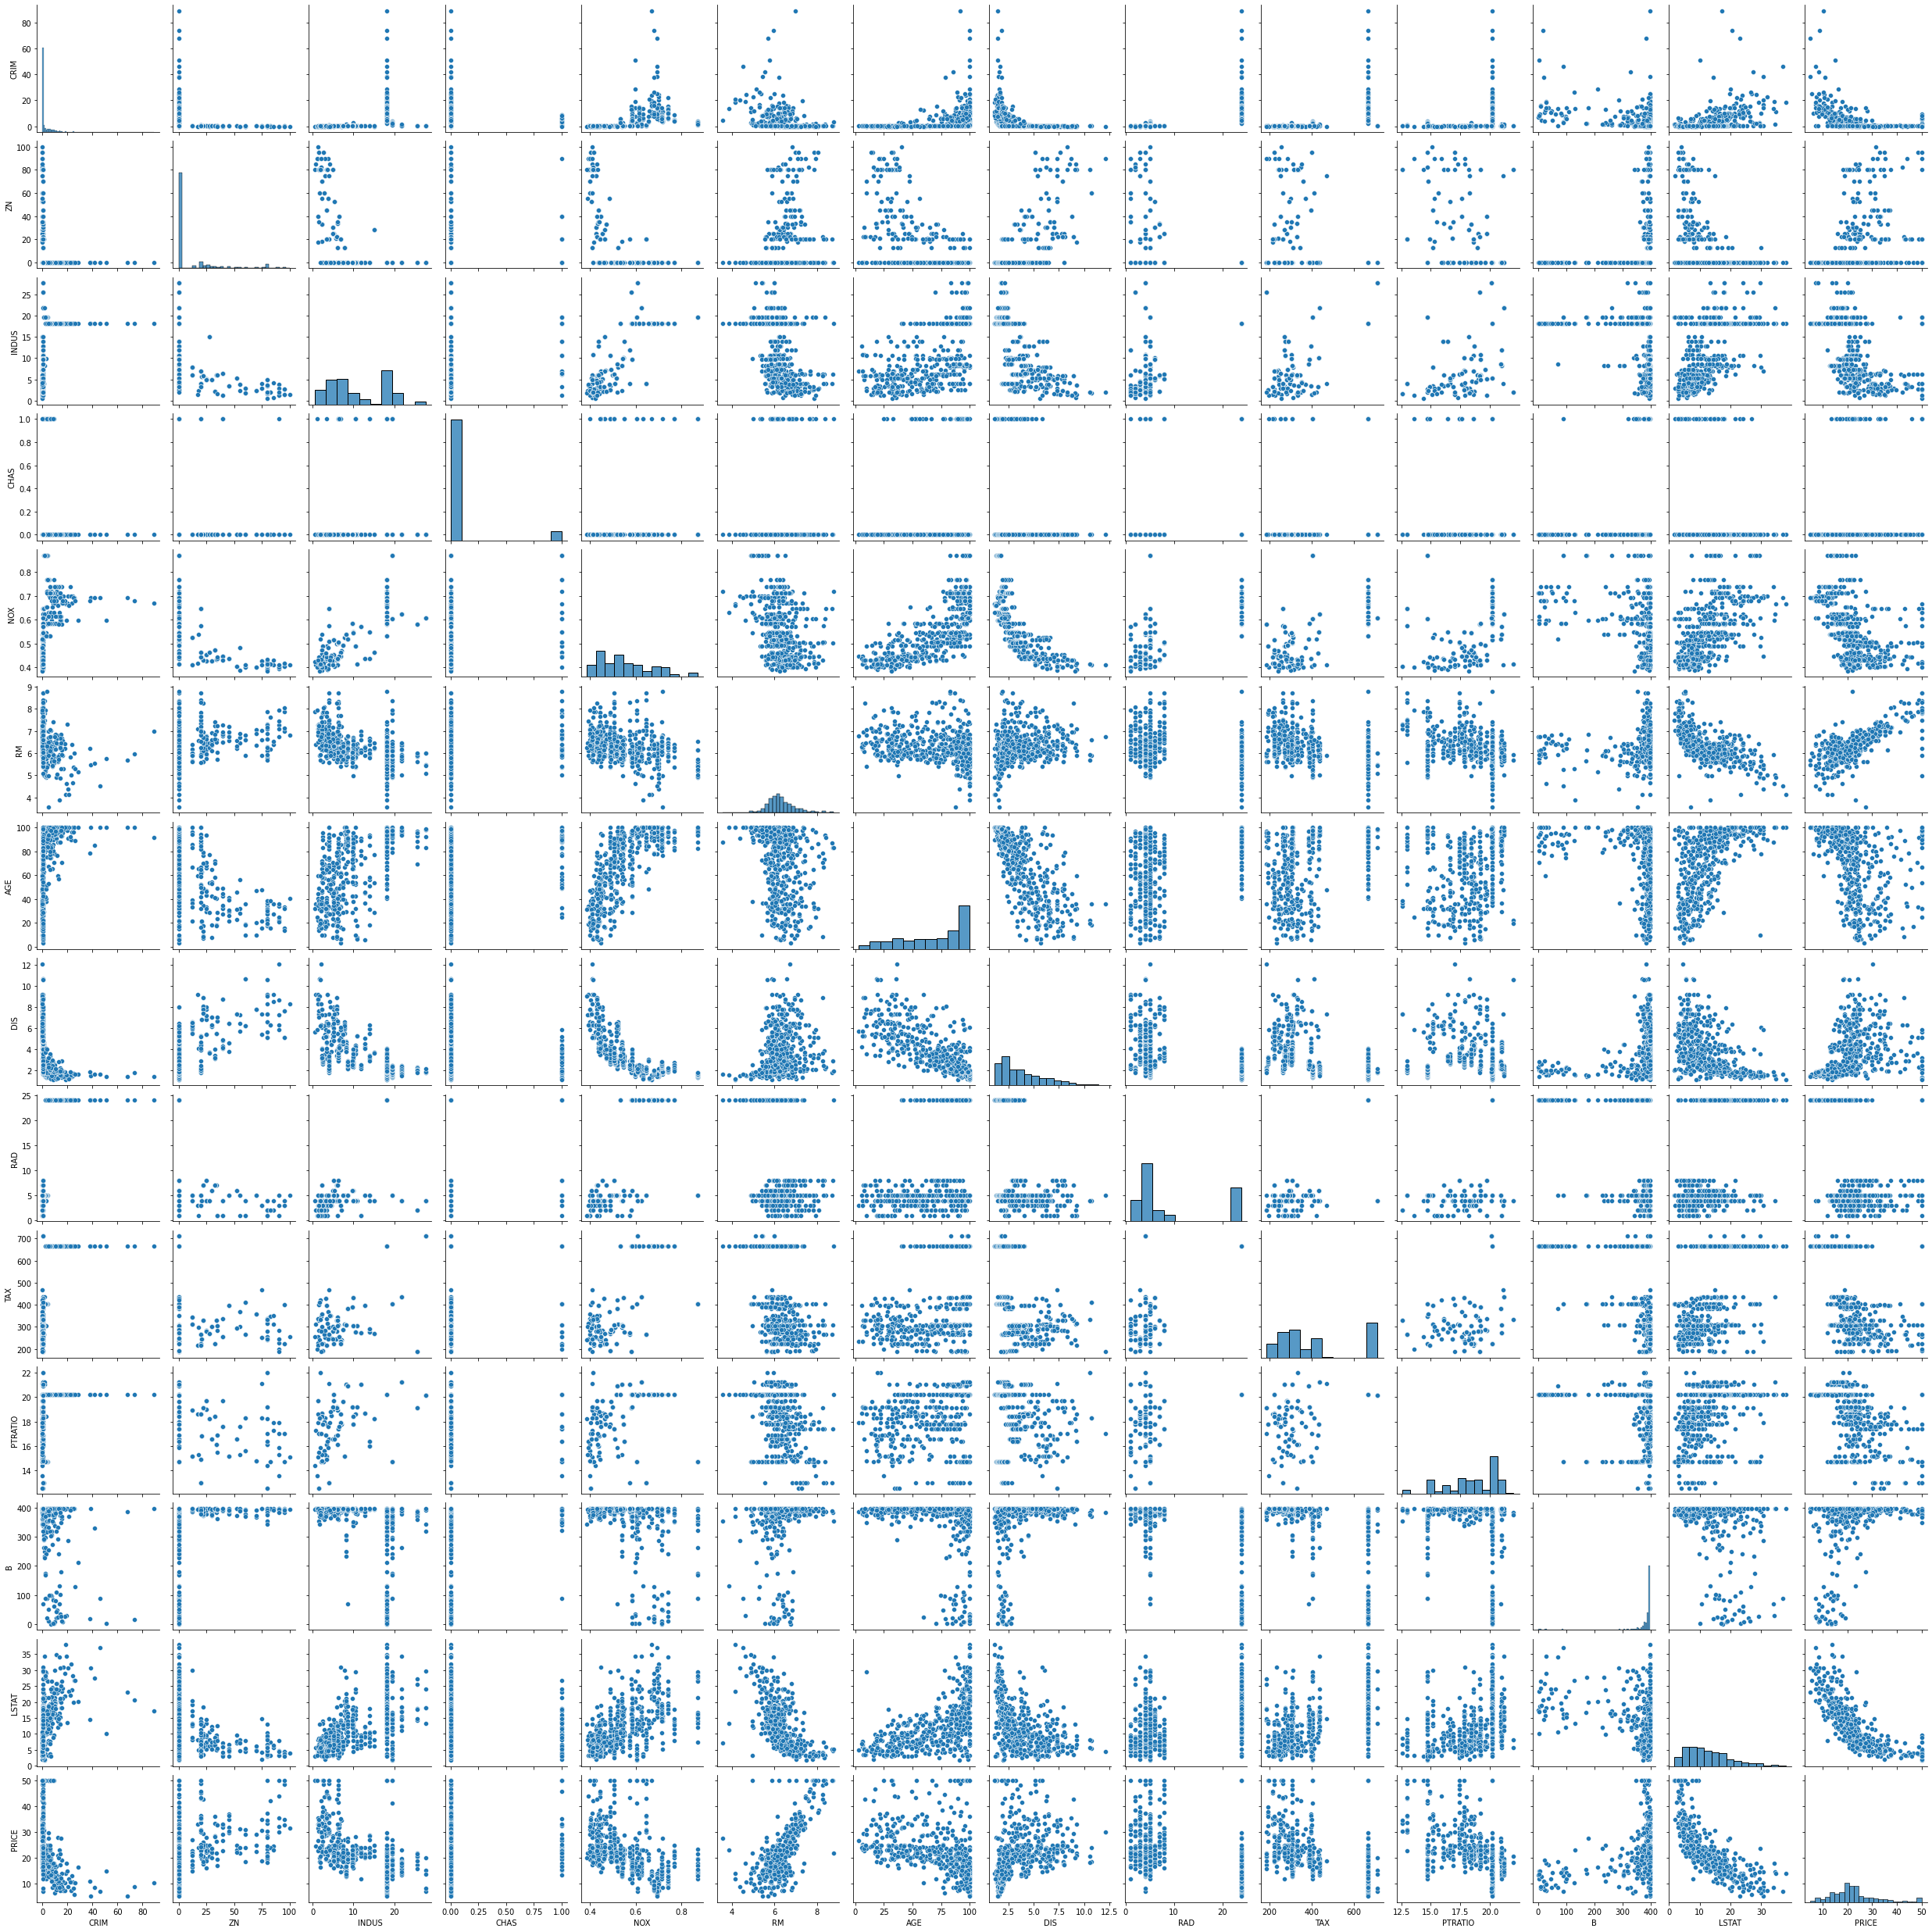

In [8]:
sns.pairplot(data)

* regression model in seaborn pairplot

[Reference](https://stackoverflow.com/questions/47200538/how-to-change-regression-model-in-seaborn-pairplot)

C:\Users\abdog\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\abdog\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\abdog\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\abdog\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


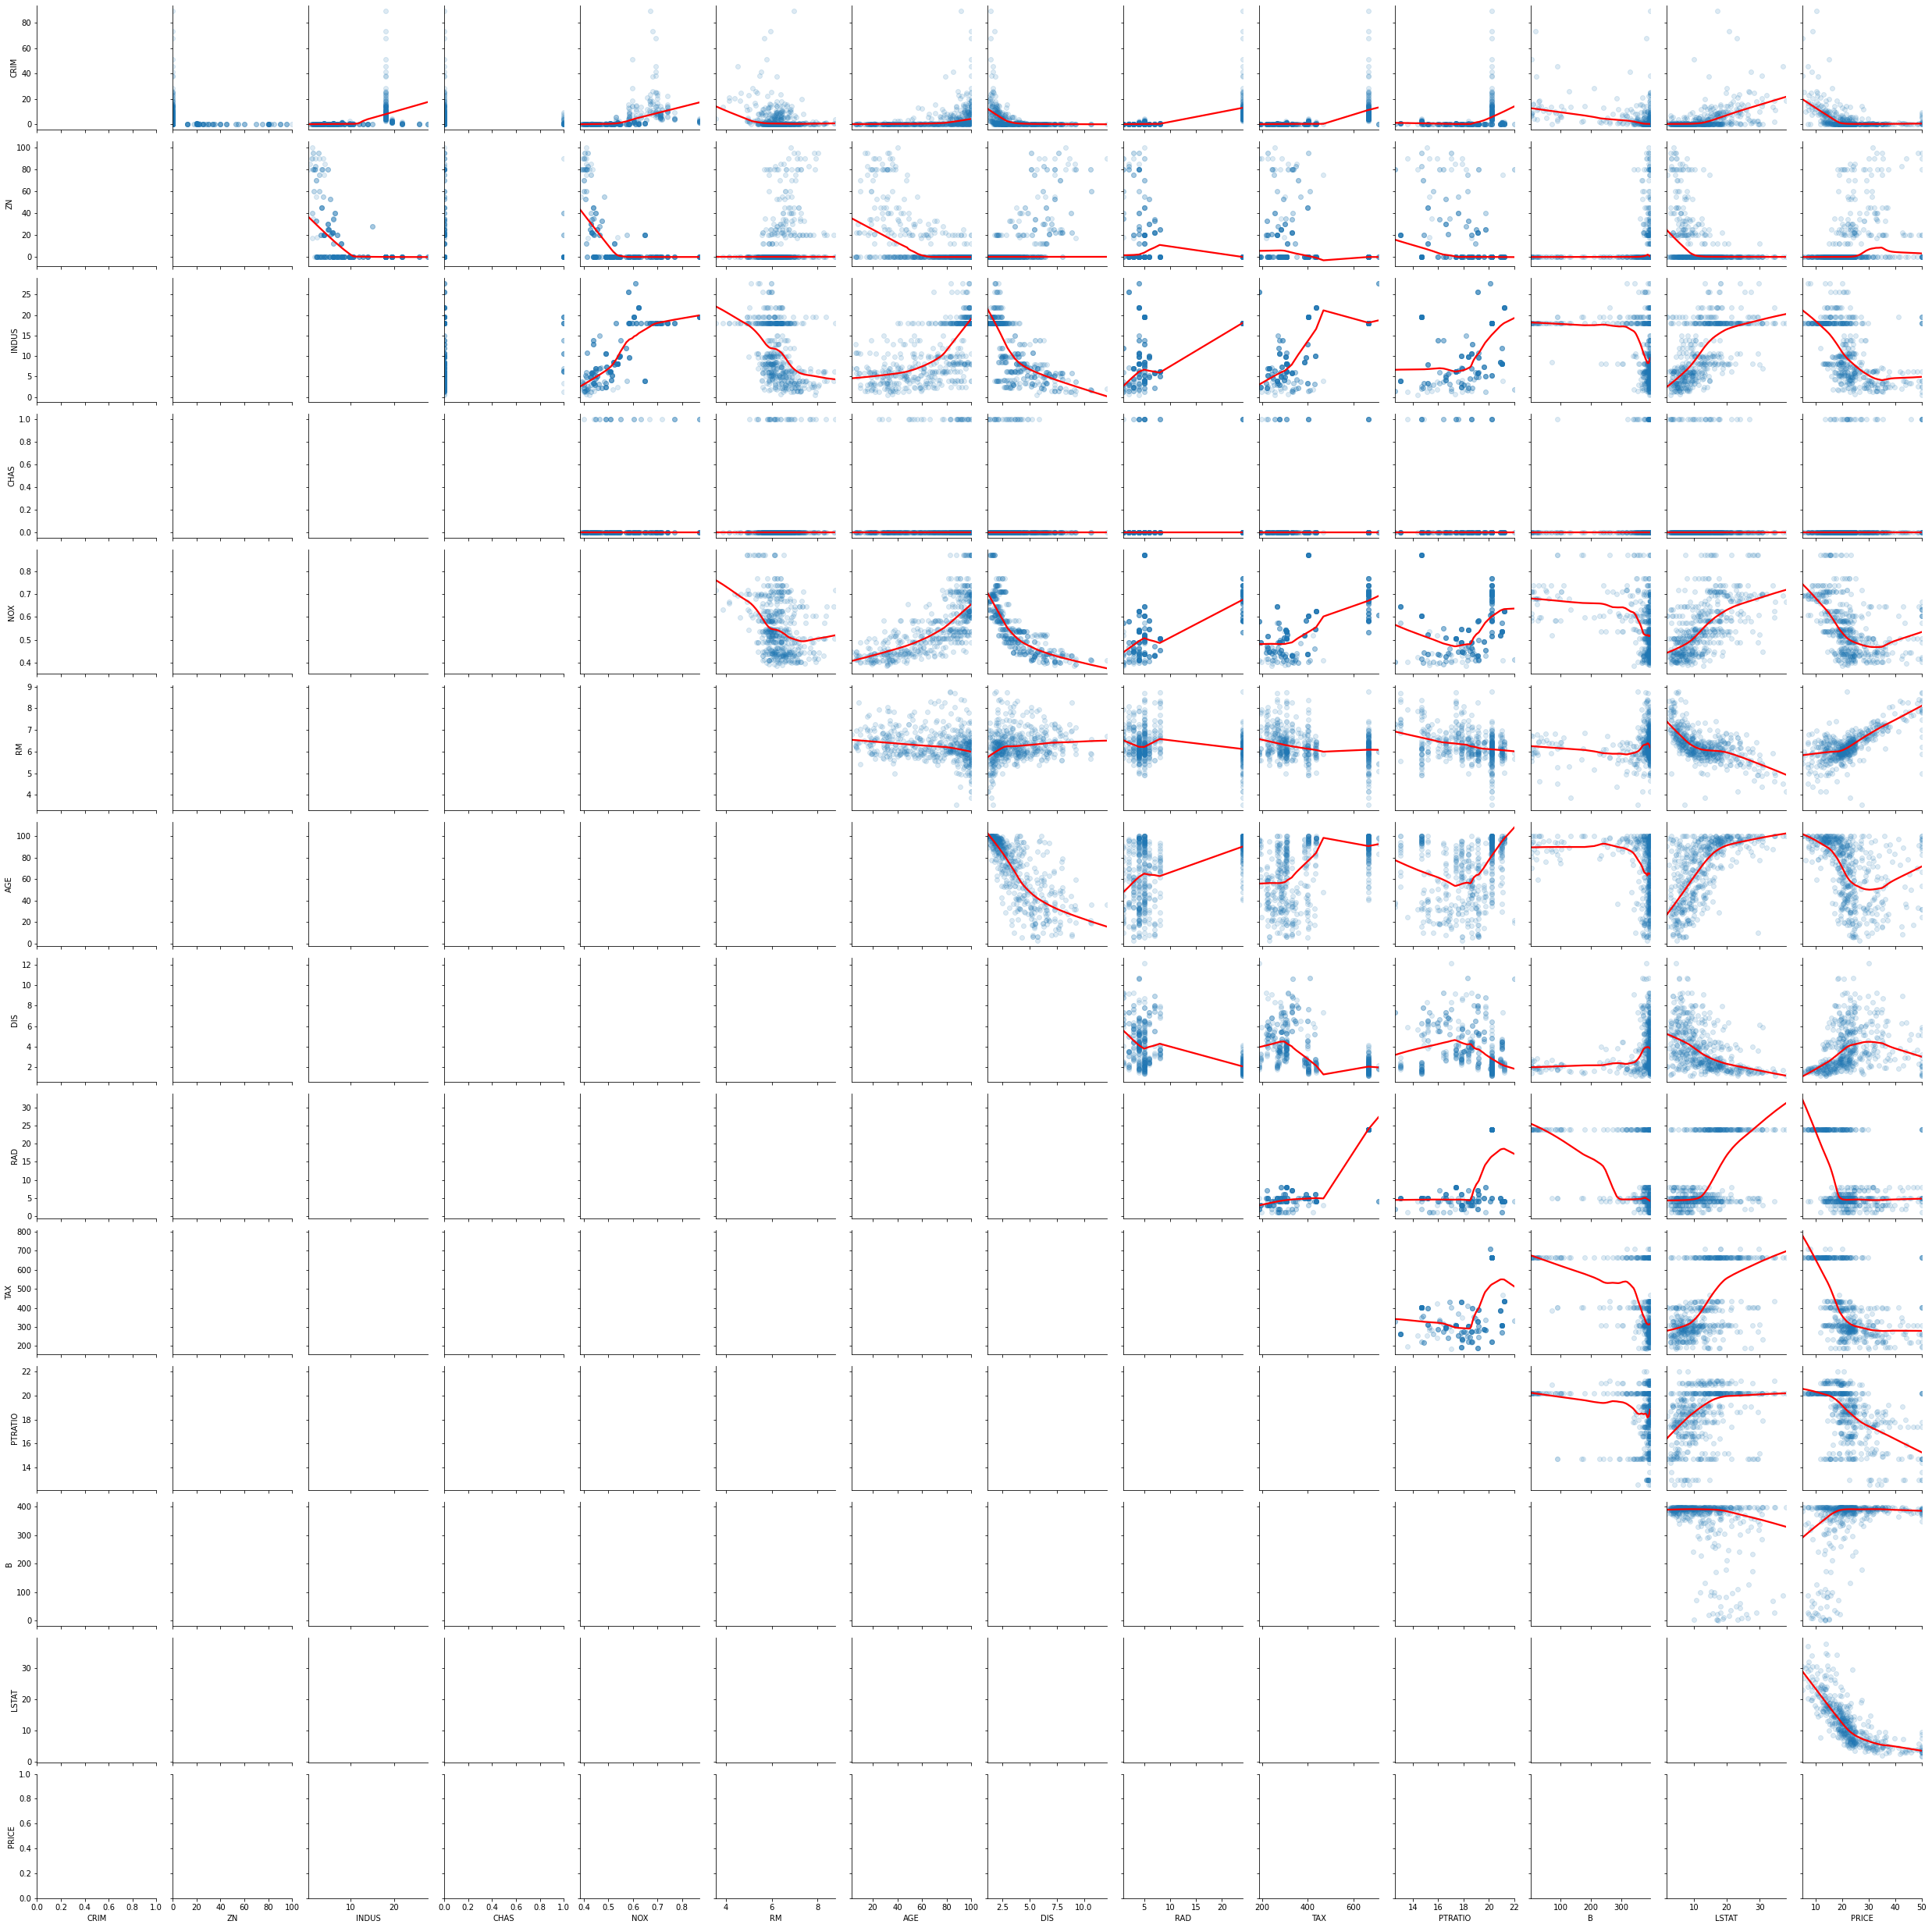

In [11]:
g = sns.PairGrid(data)
g = g.map_upper(sns.regplot, lowess=True, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})

In [8]:
#correlation matrix
matrix = data.corr()
 
# print correlation matrix
print("Correlation Matrix is : ")
print(matrix)

Correlation Matrix is : 
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B  

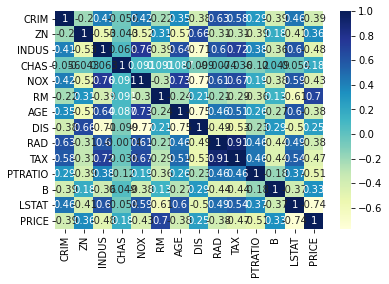

In [17]:
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [12]:
###############HOW TO RREAD THE DATASET WITHOUT DOWNLOADING

# import pandas as pd  # doctest: +SKIP
# import numpy as np

# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

# raw_df.head()

### Scale the features using sklearn.preprocessing package

In [8]:
# the scaler - for standard scaler of Normalization
from sklearn.preprocessing import StandardScaler

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(data)
# transform train and test sets
data_scaled = scaler.transform(data)
# let's transform the returned NumPy arrays to dataframes
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
#show
data_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


### Input and Output

In [9]:
# Spliting target variable and independent variables
X = data_scaled.drop(['PRICE'], axis = 1)
y = data_scaled['PRICE']

### Train/CV/Test split, model fit and prediction

In [10]:
# Splitting to training and testing data

# split the full data 80:20 into training:validation sets
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=0)

# split training data 87.5:12.5 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.775, random_state=0)

print("len(X): {} len(y): {} \nlen(X_train): {}, len(X_valid): {}, len(X_test): \
{} \nlen(y_train): {}, len(y_valid): {}, len(y_test): {}".format(len(X), len(y),\
len(X_train), len(X_valid), len(X_test), len(y_train), len(y_valid), \
len(y_test))) 

len(X): 506 len(y): 506 
len(X_train): 274, len(X_valid): 152, len(X_test): 80 
len(y_train): 274, len(y_valid): 152, len(y_test): 80


### Linear regression

#### 1. select the degree, train the model on the degree, then evaluate on the CV

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


In [25]:
CVdegree = []
CVacc = []
CVcost = []
CVcost_MSE = []
CVcost_Score = []

#thetas = []

Traindegree = []
Trainacc = []
Traincost = []
Traincost_MSE = []
Traincost_Score = []
####################################
def hypothesis_degree(n):
    for i in range(n):
        #select the degree & transform the X to the higher degree
        poly = PolynomialFeatures(degree = i+1, interaction_only=False, include_bias=False)
        X_poly = poly.fit_transform(X_train)

        #train the model on the new degree
        lm = LinearRegression()
        lm.fit(X_poly,y_train)

        #evaluate the degree selection on a new data which is the CV using the Jcv cost fucntion
        # R squared value
        import sklearn.metrics as metrics
        y_predT = lm.predict(X_poly)
        sT= metrics.explained_variance_score(y_train, y_predT)
        
        #Jtrain
        len = y_train.shape[0]
        cT=(1/(2*len))*np.sum((y_predT-y_train)**2)
        Traindegree.append(i+1)
        Trainacc.append(sT)
        Traincost.append(cT)
        
        #MSE
        Traincost_MSE.append(np.sqrt(metrics.mean_squared_error(y_train, y_predT)))
        
        #Score
        Traincost_Score.append(lm.score(poly.fit_transform(X_train), y_train))
        
        #evaluate the degree selection on a new data which is the CV using the Jcv cost fucntion
        from sklearn.metrics import accuracy_score
        y_pred = lm.predict(poly.transform(X_valid))
        s= metrics.explained_variance_score(y_valid, y_pred)
        
        #Jcv
        len = y_valid.shape[0]
        c=(1/(2*len))*np.sum((y_pred-y_valid)**2)
        CVdegree.append(i+1)
        CVacc.append(s)
        CVcost.append(c)
        
        #MSE
        CVcost_MSE.append(np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
        
        #Score
        CVcost_Score.append(lm.score(poly.fit_transform(X_valid), y_valid))
        
#         #the thetas' values for each hypothesis degree
#         for idcoff, columnname in enumerate(df.iloc[:, [0,1,2,4,5,7,8]].columns):
#             thetas.append("The coefficient for {} is {}".format(columnname, lm.coef_[0][idcoff]))
#         thetas.append("============================================ ")
            
            
            
#         print("\n ============================================ \n")

In [26]:
hypothesis_degree(6)

In [27]:
print(f'cost function values = {CVcost} \n \n accuracy values = {CVacc} \n \n Hypothesis Degree = {CVdegree} \n \n MSE = {CVcost_MSE}\n \n Score = {CVcost_Score}')
#print(f'cost function values = {CVcost} \n accuracy values = {CVacc} \n Hypothesis Degree = {CVdegree}  \n Thetas Values = {thetas}')
print(f'\n ============================================ \n')
print(f'cost function values = {Traincost} \n \n accuracy values = {Trainacc} \n \n Hypothesis Degree = {Traindegree} \n \n MSE = {Traincost_MSE} \n \n Score = {Traincost_score}')

cost function values = [0.15979752244181555, 4.355576720185027e+22, 10.472168888130255, 16.34240350532307, 92.07772106226011, 900.1481349460897] 
 
 accuracy values = [0.6766971415415981, -8.668413115425002e+22, -20.01154468464761, -31.813726790366346, -183.97256490829804, -1810.1233634877137] 
 
 Hypothesis Degree = [1, 2, 3, 4, 5, 6] 
 
 MSE = [0.5653273785017237, 295146632038.55225, 4.576498418688737, 5.717062795758513, 13.570388429389936, 42.42989830169499]
 
 Score = [0.6759753882958641, -8.831889468245077e+22, -20.234624954289036, -32.1378163391283, -185.70782473904788, -1824.2482607063569]


cost function values = [0.1284134478638273, 0.018718707914511357, 3.779185698499365e-28, 1.2225574627516409e-27, 3.5997336235944323e-26, 4.344817829208387e-25] 
 
 accuracy values = [0.7541603733965762, 0.9641641987134653, 1.0, 1.0, 1.0, 1.0] 
 
 Hypothesis Degree = [1, 2, 3, 4, 5, 6] 
 
 MSE = [0.5067809149204957, 0.1934875081989086, 2.7492492424294184e-14, 4.9448103355975964e-14, 2.6831822

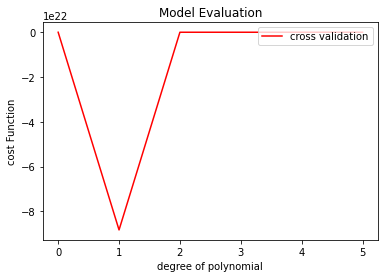

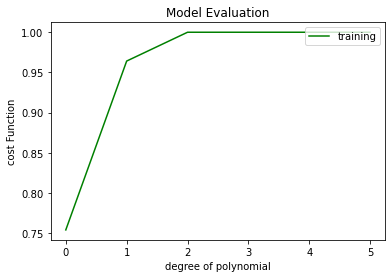

In [30]:
plt.figure()
plt.title("Model Evaluation - Score")
plt.plot(CVcost_Score,'r')
plt.ylabel(f'cost Function')
plt.xlabel('degree of polynomial')
plt.legend(['cross validation'],loc='upper right')

plt.figure()
plt.title("Model Evaluation - Score")
plt.plot(Traincost_Score,'g')
plt.ylabel(f'cost Function')
plt.xlabel('degree of polynomial')
plt.legend(['training'],loc='upper right')

> Calculation of the cost is done by score Method

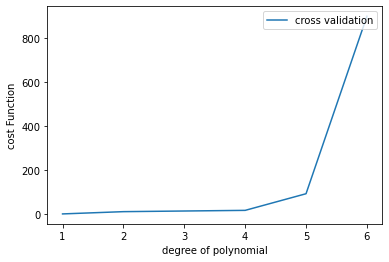

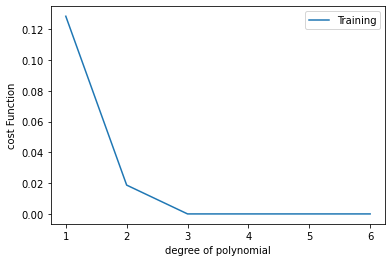

In [34]:
plt.figure()
plt.title("Model Evaluation - MSE")
plt.plot([1, 2, 4, 5, 6], [0.15979752244181555, 10.472168888130255, 16.34240350532307, 92.07772106226011, 900.1481349460897])
plt.ylabel(f'cost Function')
plt.xlabel('degree of polynomial')
plt.legend(['cross validation'],loc='upper right')

plt.figure()
plt.title("Model Evaluation - MSE")
plt.plot([1, 2, 3, 4, 5, 6], [0.1284134478638273, 0.018718707914511357, 3.779185698499365e-28, 1.2225574627516409e-27, 3.5997336235944323e-26, 4.344817829208387e-25])
plt.ylabel(f'cost Function')
plt.xlabel('degree of polynomial')
plt.legend(['Training'],loc='upper right')

> Calculation of the cost is done by Mean Square Error Method

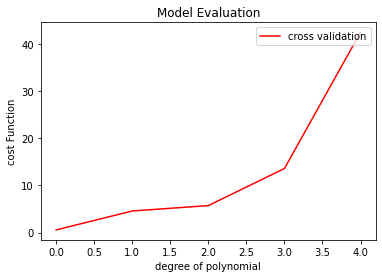

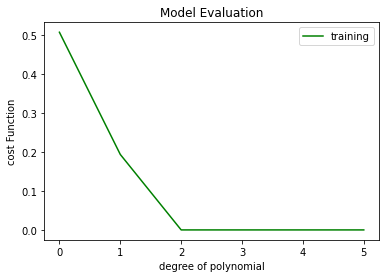

In [33]:
#[0.5653273785017237, 295146632038.55225, 4.576498418688737, 5.717062795758513, 13.570388429389936, 42.42989830169499]
#[0.5067809149204957, 0.1934875081989086, 2.7492492424294184e-14, 4.9448103355975964e-14, 2.6831822985382237e-13, 9.321821527157004e-13]
plt.figure()
plt.title("Model Evaluation")
plt.plot([0.5653273785017237, 4.576498418688737, 5.717062795758513, 13.570388429389936, 42.42989830169499],'r')
plt.ylabel(f'cost Function')
plt.xlabel('degree of polynomial')
plt.legend(['cross validation'],loc='upper right')

plt.figure()
plt.title("Model Evaluation")
plt.plot(Traincost_MSE,'g')
plt.ylabel(f'cost Function')
plt.xlabel('degree of polynomial')
plt.legend(['training'],loc='upper right')

* Observation:-
>the best and simple degree is one not two
<br> ;since one is the simplest. Despite, it has a little bit high cost function than two

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

_PolynomialFeatures:_
Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]
<br>

_Polynomial features:_ are those features created by raising existing features to an exponent. For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2

In [51]:
#select the degree & transform the X to the higher degree
poly = PolynomialFeatures(degree = 1)
X_poly = poly.fit_transform(X_train)

In [52]:
# Create a Linear regressor
lm = LinearRegression()
#train the model on the new degree
lm.fit(X_poly,y_train)

LinearRegression()

In [53]:
#evaluate the degree selection on a new data which is the CV using the Jcv cost fucntion (score)
print(lm.score(poly.transform(X_valid), y_valid)*100,'%')

print("============================================")

# R squared value
import sklearn.metrics as metrics
y_pred = lm.predict(poly.transform(X_valid))
print(metrics.explained_variance_score(y_valid, y_pred))

67.59753882958638 %
0.6766971415415979


In [45]:
#https://stackoverflow.com/questions/57671229/nameerror-name-metrics-is-not-defined
#https://stackoverflow.com/questions/45627784/unable-to-obtain-accuracy-score-for-my-linear
#https://stackoverflow.com/questions/32664717/got-continuous-is-not-supported-error-in-randomforestregressor

# from sklearn.metrics import classification_report
# print(classification_report(y_valid, y_pred))

# from sklearn.metrics import accuracy_score
# print ("Accuracy : ", accuracy_score(y_valid, y_pred))

#### 2. calculate the theta's
> They have value with degree one only

> The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.

> The coefficient value represents the mean change in the response given a one unit change in the predictor. For example, if a coefficient is +3, the mean response value increases by 3 for every one unit change in the predictor.

[Reference](https://statisticsbyjim.com/glossary/regression-coefficient/#:~:text=Regression%20coefficients%20are%20estimates%20of,that%20multiply%20the%20predictor%20values.)

In [54]:
#the thetas' values
for idcoff, columnname in enumerate(data_scaled.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]].columns):
    print("The coefficient for {} is {}".format(columnname, lm.coef_[idcoff]))

The coefficient for CRIM is 0.0
The coefficient for ZN is -0.11276150911724692
The coefficient for INDUS is 0.11970970807471129
The coefficient for CHAS is 0.0038394590050062015
The coefficient for NOX is 0.08895680660510633
The coefficient for RM is -0.23523727645050654
The coefficient for AGE is 0.2449448674424388
The coefficient for DIS is 0.06485487722006981
The coefficient for RAD is -0.32282848438790623
The coefficient for TAX is 0.2911552597687952
The coefficient for PTRATIO is -0.24745128939986075
The coefficient for B is -0.23862603868580792
The coefficient for LSTAT is 0.014840156446115978


#### 3. Testing based on the test set

In [55]:
#evaluate the degree selection on a new data which is the test set using the Jtest cost fucntion (score)
print(f'The score = {lm.score(poly.transform(X_test), y_test)*100} %')

print("============================================")

# R squared value, Used here as alternative of accuracy_score since it can't deal with continuity of target variable
import sklearn.metrics as metrics
y_predtest = lm.predict(poly.transform(X_test))
print(f'The R squared value = {metrics.explained_variance_score(y_test, y_predtest)}')

The score = 77.37037369044273 %
The R squared value = 0.773703762270687


In [58]:
#Evaluate the generalization by Jtest

#predict
y_predTest = lm.predict(poly.transform(X_test))

#cost Cal.
len = y_train.shape[0]
cTest=(1/(2*len))*np.sum((y_predTest-y_test)**2)

#print Jtest
print(f'Estimatation of generalization error for test set {cTest}')

#print  MSE
MSE_Test = np.sqrt(metrics.mean_squared_error(y_predTest, y_test))
print(f'MSE for test set {MSE_Test}')

Estimatation of generalization error for test set 0.02853481496536324
MSE for test set 0.44211252245637445


### Regularization
> Now, will apply regularization techniques and review the scores and impact of the techniques on the model.

[Reference1](https://www.analyticsvidhya.com/blog/2021/11/study-of-regularization-techniques-of-linear-model-and-its-roles/)
<br>
[Reference2](https://harish-reddy.medium.com/regularization-in-python-699cfbad8622#:~:text=How%20does%20regularization%20work%3F,term%E2%80%9D%20that%20penalizes%20coefficient%20size.)

##### Ridge Regression Regularization (L2)

In [60]:
λ=[0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24] #values from page 10 Lecture Diagnostics II except the 0

In [62]:
#RIDGE (L2)		LASSO (L1)
from sklearn import linear_model
for i in λ:
    ridge = linear_model.Ridge(alpha=i)
    ridge.fit(X_poly,y_train)
    print ("Ridge model:", (ridge.coef_))
    print(f'\n For parameter equals {i} :-')
    print(ridge.score(poly.transform(X_train), y_train))
    print(ridge.score(poly.transform(X_test), y_test))
    print("\n ========================= \n")

Ridge model: [ 0.         -0.11274902  0.119676    0.00379641  0.08896253 -0.23516775
  0.24497252  0.06481855 -0.32277676  0.29100254 -0.24731263 -0.2386145
  0.01484969 -0.47082434]
For parameter equals 0.01 :-
0.7541603686527458
0.7737339692272568


Ridge model: [ 0.         -0.11273654  0.11964233  0.00375341  0.08896825 -0.23509826
  0.24500015  0.06478226 -0.32272506  0.29084998 -0.24717413 -0.23860298
  0.01485921 -0.47078034]
For parameter equals 0.02 :-
0.7541603544372999
0.7737641669182321


Ridge model: [ 0.         -0.11271161  0.11957505  0.00366755  0.08897965 -0.23495943
  0.24505534  0.06470976 -0.3226217   0.29054535 -0.24689763 -0.23857994
  0.01487825 -0.47069241]
For parameter equals 0.04 :-
0.7541602976875453
0.7738244586461489


Ridge model: [ 0.         -0.1126619   0.11944084  0.00349643  0.08900235 -0.23468227
  0.24516543  0.06456512 -0.3224152   0.28993803 -0.24634661 -0.23853396
  0.01491629 -0.47051678]
For parameter equals 0.08 :-
0.7541600715804357
0.7739

* The optimal value for λ is 10.24

>•Very small value of 𝜆 will cause over fitting in complicated Hypothesis
<br>
>•Very large value of 𝜆 will cause under fitting

##### Lasso Regression Regularization (L1)

In [63]:
for i in λ: 
    lasso = linear_model.Lasso(alpha=i)
    lasso.fit(X_poly,y_train)
    print ("Lasso model:", (lasso.coef_))
    print(f'\n For parameter equals {i}:-')
    print(lasso.score(poly.transform(X_train), y_train))
    print(lasso.score(poly.transform(X_test), y_test))
    print("\n ========================= \n")

Lasso model: [ 0.         -0.08934197  0.07717572 -0.01018159  0.08215539 -0.16307748
  0.26933868  0.00739367 -0.27268062  0.13629865 -0.12004832 -0.22747311
  0.00872362 -0.45183232]
For parameter equals 0.01:-
0.7490515736115391
0.7953839355178416


Lasso model: [ 0.         -0.06502072  0.04068122 -0.01976948  0.07380893 -0.11017192
  0.28569529  0.         -0.20558241  0.         -0.00681389 -0.21946426
  0.00072331 -0.45038757]
For parameter equals 0.02:-
0.7367488551264303
0.7924997769125388


Lasso model: [ 0.         -0.04968     0.         -0.          0.04168462 -0.0353888
  0.29270415  0.         -0.08421821 -0.         -0.01276134 -0.21949609
  0.         -0.44468407]
For parameter equals 0.04:-
0.7199918099465863
0.7708709072402433


Lasso model: [ 0.         -0.02420678  0.         -0.          0.         -0.
  0.28327844  0.         -0.         -0.         -0.         -0.20290925
  0.         -0.41496238]
For parameter equals 0.08:-
0.6932867552019313
0.7375442355198387

* The optimal value for λ is 0.01

_Model fitment justification during training and testing_

* Model is doing strongly at training set and poorly in test set means we’re at OVERFIT
* Model is doing poor at both (Training and Testing) means we’re at UNDERFIT
* Model is doing better and considers ways in both (Training and Test), means we’re at the RIGHT FIT

-------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------

# <center><font color = yellow> الحمد لله </font> <center>